# Clasificador Binario xchest
Clasificación de radiografías de pecho con neumonía y normales

Importacion de librerías

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Importación de dataset desde Kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "drive/My Drive/Deep Learning/kaggle/"
!kaggle datasets download -dpaultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:51<00:00, 35.8MB/s]
100% 2.29G/2.29G [00:51<00:00, 48.1MB/s]


Descompresión del dataset descargado

In [ ]:
!unzip -q chest-xray-pneumonia.zip -d tmp

Procesamiento del dataset

In [ ]:
TRAINING_DIR = 'tmp/chest_xray/train'
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

TESTING_DIR = 'tmp/chest_xray/test'
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Modelo y optimizador

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense( 1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Entrenamiento

In [ ]:
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=validation_generator)

Epoch 1/10
41/41 [==============================] - 67s 2s/step - loss: 4.3109 - accuracy: 0.7435 - val_loss: 0.3860 - val_accuracy: 0.8333
Epoch 2/10
41/41 [==============================] - 67s 2s/step - loss: 0.2454 - accuracy: 0.9018 - val_loss: 0.3360 - val_accuracy: 0.8429
Epoch 3/10
41/41 [==============================] - 65s 2s/step - loss: 0.1818 - accuracy: 0.9266 - val_loss: 0.7376 - val_accuracy: 0.7324
Epoch 4/10
41/41 [==============================] - 65s 2s/step - loss: 0.1493 - accuracy: 0.9427 - val_loss: 0.5448 - val_accuracy: 0.7772
Epoch 5/10
41/41 [==============================] - 66s 2s/step - loss: 0.1256 - accuracy: 0.9517 - val_loss: 0.8706 - val_accuracy: 0.7115
Epoch 6/10
41/41 [==============================] - 66s 2s/step - loss: 0.1224 - accuracy: 0.9538 - val_loss: 0.5772 - val_accuracy: 0.7740
Epoch 7/10
41/41 [==============================] - 66s 2s/step - loss: 0.1233 - accuracy: 0.9540 - val_loss: 0.9476 - val_accuracy: 0.7099
Epoch 8/10
41/41 [==

Resultado


In [ ]:
def resultado(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

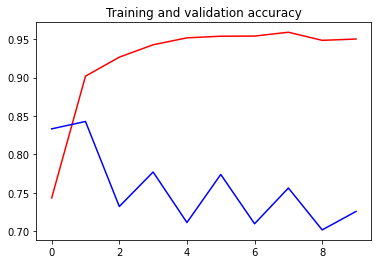

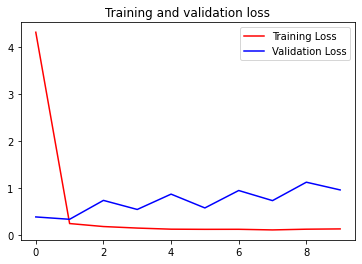

In [ ]:
resultado(history)

## CNN, Data Augmentation y ajuste de hiperparametros



Data Augmentation

In [ ]:
TRAINING_DIR = 'tmp/chest_xray/train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

TESTING_DIR = 'tmp/chest_xray/test'
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Convolutional Neural Network y ajustes de hiperparametros

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense( 1, activation='sigmoid')
])


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])



Prueba de hiperparametros  

 

In [ ]:
history2 = model.fit(train_generator, 
                    steps_per_epoch=12,
                    epochs=60, 
                    validation_data=validation_generator,
                    validation_steps=12)

Epoch 1/60
12/12 [==============================] - 103s 9s/step - loss: 1.1396 - accuracy: 0.6315 - val_loss: 0.6986 - val_accuracy: 0.6172
Epoch 2/60
12/12 [==============================] - 104s 9s/step - loss: 0.5970 - accuracy: 0.7233 - val_loss: 0.6543 - val_accuracy: 0.6432
Epoch 3/60
12/12 [==============================] - 102s 8s/step - loss: 0.5865 - accuracy: 0.7480 - val_loss: 0.6643 - val_accuracy: 0.6172
Epoch 4/60
12/12 [==============================] - 101s 8s/step - loss: 0.5598 - accuracy: 0.7480 - val_loss: 0.6729 - val_accuracy: 0.6250
Epoch 5/60
12/12 [==============================] - 100s 8s/step - loss: 0.4844 - accuracy: 0.7812 - val_loss: 0.4300 - val_accuracy: 0.8307
Epoch 6/60
12/12 [==============================] - 101s 8s/step - loss: 0.4549 - accuracy: 0.7826 - val_loss: 0.5086 - val_accuracy: 0.7708
Epoch 7/60
12/12 [==============================] - 101s 8s/step - loss: 0.3808 - accuracy: 0.8379 - val_loss: 0.4034 - val_accuracy: 0.8333
Epoch 8/60
12

Resultado 2

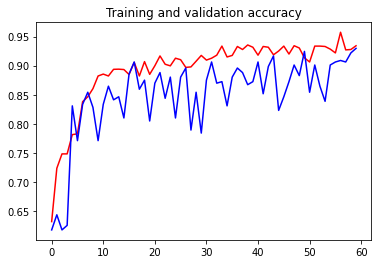

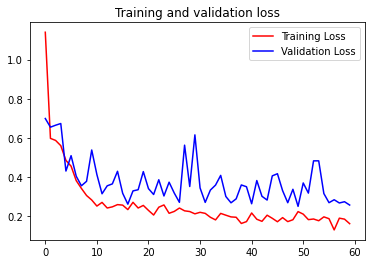

In [ ]:
resultado(history2)

# CNN con Transfer Learning Inception V3

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-10-17 23:47:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  72.9MB/s    in 1.1s    

2020-10-17 23:47:26 (72.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history3 = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 25,
            epochs = 25,
            validation_steps = 10)

Epoch 1/25
25/25 [==============================] - 169s 7s/step - loss: 0.4670 - accuracy: 0.8532 - val_loss: 0.4835 - val_accuracy: 0.7875
Epoch 2/25
25/25 [==============================] - 170s 7s/step - loss: 0.2141 - accuracy: 0.9119 - val_loss: 0.5048 - val_accuracy: 0.7906
Epoch 3/25
25/25 [==============================] - 167s 7s/step - loss: 0.1903 - accuracy: 0.9208 - val_loss: 0.5926 - val_accuracy: 0.8000
Epoch 4/25
25/25 [==============================] - 170s 7s/step - loss: 0.1530 - accuracy: 0.9409 - val_loss: 0.4163 - val_accuracy: 0.8781
Epoch 5/25
25/25 [==============================] - 170s 7s/step - loss: 0.1587 - accuracy: 0.9362 - val_loss: 0.7000 - val_accuracy: 0.8188
Epoch 6/25
25/25 [==============================] - 168s 7s/step - loss: 0.1425 - accuracy: 0.9444 - val_loss: 0.2899 - val_accuracy: 0.9094
Epoch 7/25
25/25 [==============================] - 170s 7s/step - loss: 0.1535 - accuracy: 0.9413 - val_loss: 0.3543 - val_accuracy: 0.8938
Epoch 8/25
25

In [ ]:
resultado(history3)

In [ ]:
Modelo con regularización Dropout 0.8

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.8)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history4 = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 36,
            epochs = 25,
            validation_steps = 24)

Epoch 1/25
36/36 [==============================] - 240s 7s/step - loss: 0.2051 - accuracy: 0.9163 - val_loss: 0.4079 - val_accuracy: 0.8469
Epoch 2/25
36/36 [==============================] - 240s 7s/step - loss: 0.1687 - accuracy: 0.9349 - val_loss: 0.2330 - val_accuracy: 0.9250
Epoch 3/25
36/36 [==============================] - 239s 7s/step - loss: 0.1617 - accuracy: 0.9412 - val_loss: 0.3973 - val_accuracy: 0.8781
Epoch 4/25
36/36 [==============================] - 238s 7s/step - loss: 0.1550 - accuracy: 0.9447 - val_loss: 0.2364 - val_accuracy: 0.9281
Epoch 5/25
36/36 [==============================] - 239s 7s/step - loss: 0.1511 - accuracy: 0.9417 - val_loss: 0.3245 - val_accuracy: 0.9250
Epoch 6/25
36/36 [==============================] - 240s 7s/step - loss: 0.1501 - accuracy: 0.9434 - val_loss: 0.3426 - val_accuracy: 0.9094
Epoch 7/25
36/36 [==============================] - 240s 7s/step - loss: 0.1459 - accuracy: 0.9436 - val_loss: 0.2871 - val_accuracy: 0.9125
Epoch 8/25
36

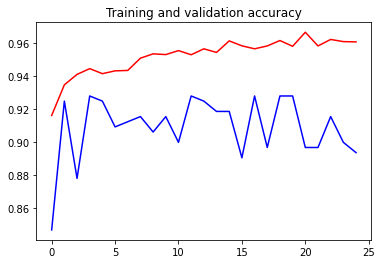

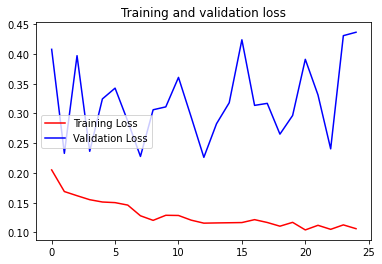

In [ ]:
resultado(history4)

In [ ]:
model-evaluate(
    x=None, y=None, 
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)